In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage as sk
import os
import skimage.io

In [350]:
TEST = "Data/TEST/"
TRAIN = "Data/TRAIN/"

CSVs = []
IMGs = []
for i in os.listdir(TEST):
    if "csv" in i:
        CSVs.append(TEST + i)
    if "jpg" in i or "png" in i:
        IMGs.append(TEST + i)

CSVs = sorted(CSVs)
IMGs = sorted(IMGs)

print(CSVs, IMGs)

tables = [pd.read_csv(c, header=None) for c in CSVs]
images = [cv2.imread(i) for i in IMGs]

['Data/TEST/ex01.csv', 'Data/TEST/ex02.csv', 'Data/TEST/ex03.csv', 'Data/TEST/ex04.csv', 'Data/TEST/ex05.csv'] ['Data/TEST/ex01.jpg', 'Data/TEST/ex02.jpg', 'Data/TEST/ex03.jpg', 'Data/TEST/ex04.jpg', 'Data/TEST/ex05.jpg']


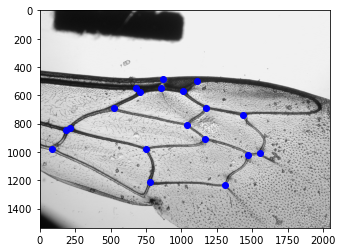

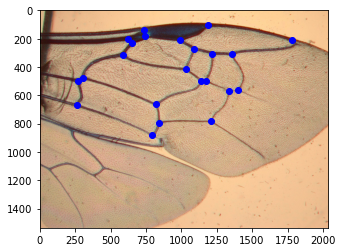

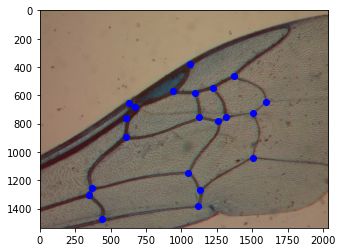

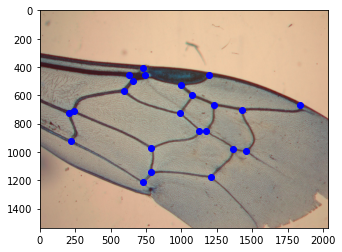

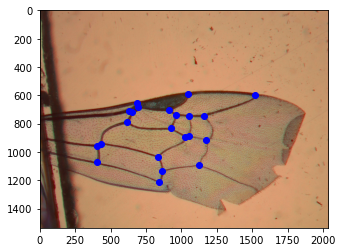

In [351]:
for i in range(len(CSVs)):
    plt.imshow(images[i], cmap='gray')
    plt.scatter(tables[i][1], tables[i][0], color='b', marker="o")
    plt.show()

In [352]:
def apply(image):
    image = skimage.img_as_float(image)
    # Upscale image

    # Extract veins from wings

    # Convert into grayscale and apply plenty of other colorspace transforms to the image to better show the junctions

    # Find a Way to do watershed, openings, closing and more to remove unnecessary parts from the image (dirt, black spots, etc)

    return image

for i, image in zip(range(len(images)), images):
    images[i] = apply(image)

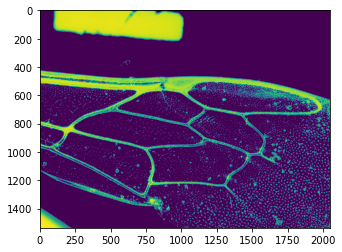

In [358]:
img = rgb2gray(images[0])
img = 1 - img
img[img < 0.45] = 0
plt.imshow(img)

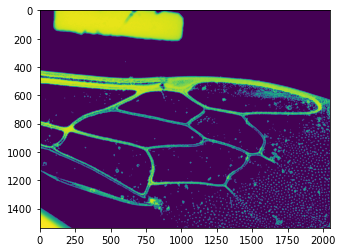

In [359]:
footprint = morphology.disk(2)
res = morphology.white_tophat(img, footprint)
cleaned = morphology.remove_small_objects(arr, min_size=2)
plt.imshow(img - res)

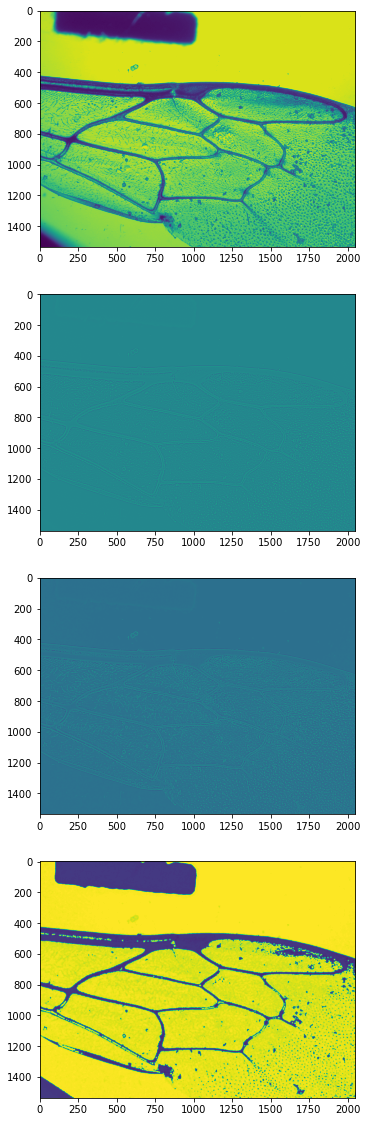

In [360]:
from skimage import filters
from skimage.morphology import skeletonize, opening, erosion, closing, ball, square, cube , disk

footprint = cube(2)

img = rgb2gray(images[0])
img_blurred = filters.gaussian(img, sigma=2)
res = img_blurred - img
closed = closing(res, square(3))
erosed = erosion(cleaned, disk(2))
f, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(25,20))
ax0.imshow(img)
ax1.imshow(res)
ax2.imshow(closed)
end_res = opening(res - (erosed + closed), square(7))
ax3.imshow(end_res)

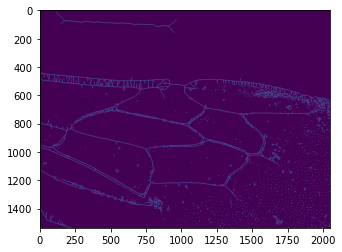

In [361]:
from skimage.morphology import skeletonize, ball, square, thin
skeleton = thin(erosed)
plt.imshow(skeleton)

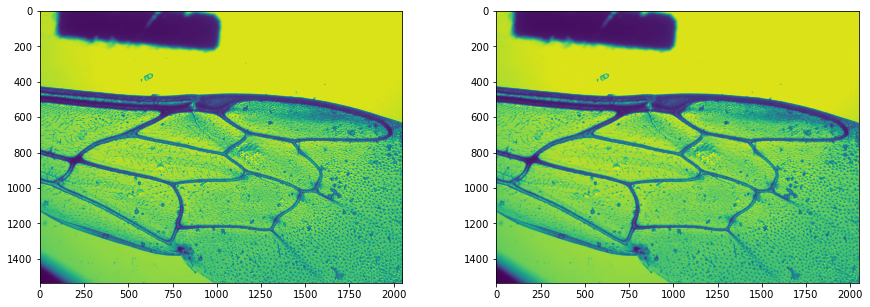

In [362]:
from skimage import filters
from skimage.color import rgb2gray
img_denoised = filters.median(img, selem=np.ones((5,5)))
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(img)
ax1.imshow(img_denoised)

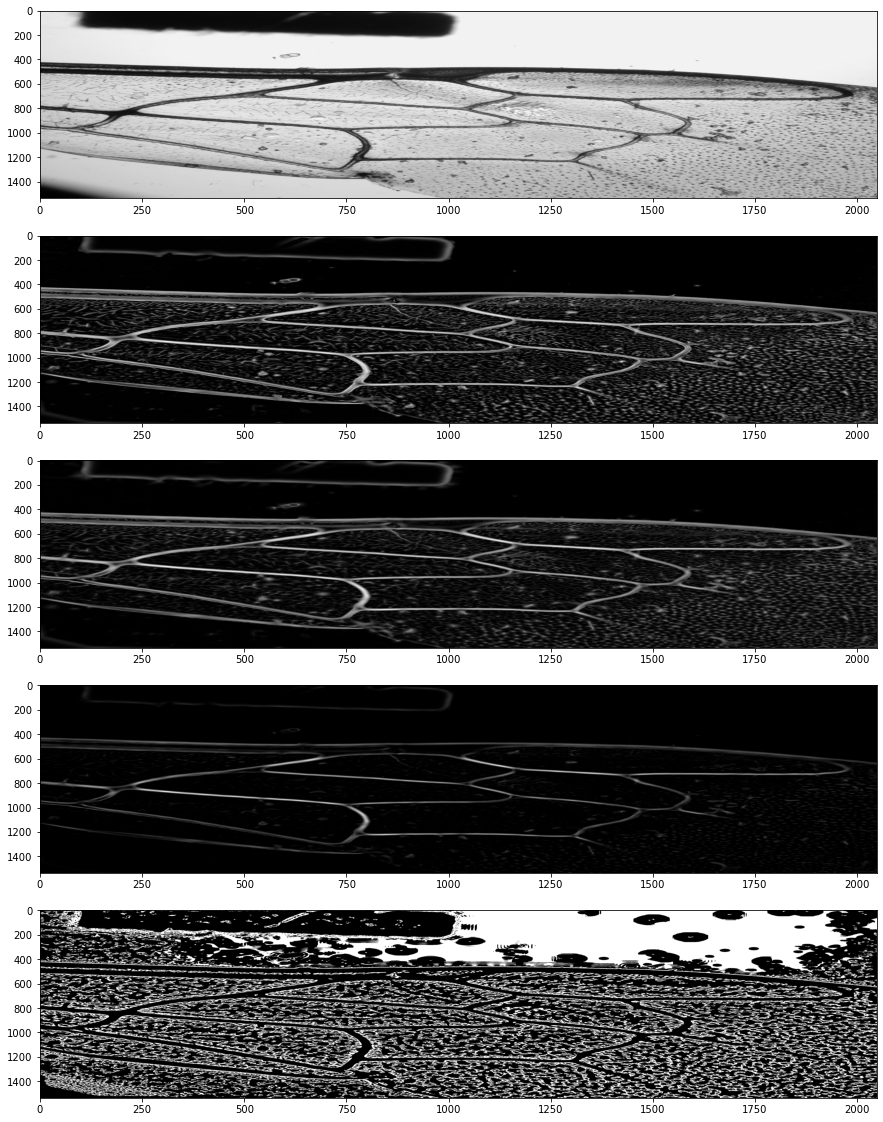

In [464]:
from skimage.filters import meijering, sato, frangi, hessian
kwargs = {'sigmas': range(1, 10, 2), 'mode': 'reflect'}
img = rgb2gray(images[0])
img_blurred = filters.gaussian(img, sigma=2)
img_denoised = filters.median(img, selem=np.ones((5,5)))
res = img_denoised
image = res
meij = meijering(image, **kwargs)
saato = sato(image, **kwargs)
frang = frangi(image, **kwargs)
hess = hessian(image, **kwargs)
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(15,20))
ax0.imshow(image, cmap='gray', aspect='auto')
ax1.imshow(meij, cmap='gray', aspect='auto')
ax2.imshow(saato, cmap='gray', aspect='auto')
ax3.imshow(frang, cmap='gray', aspect='auto')
ax4.imshow(hess, cmap='gray', aspect='auto')

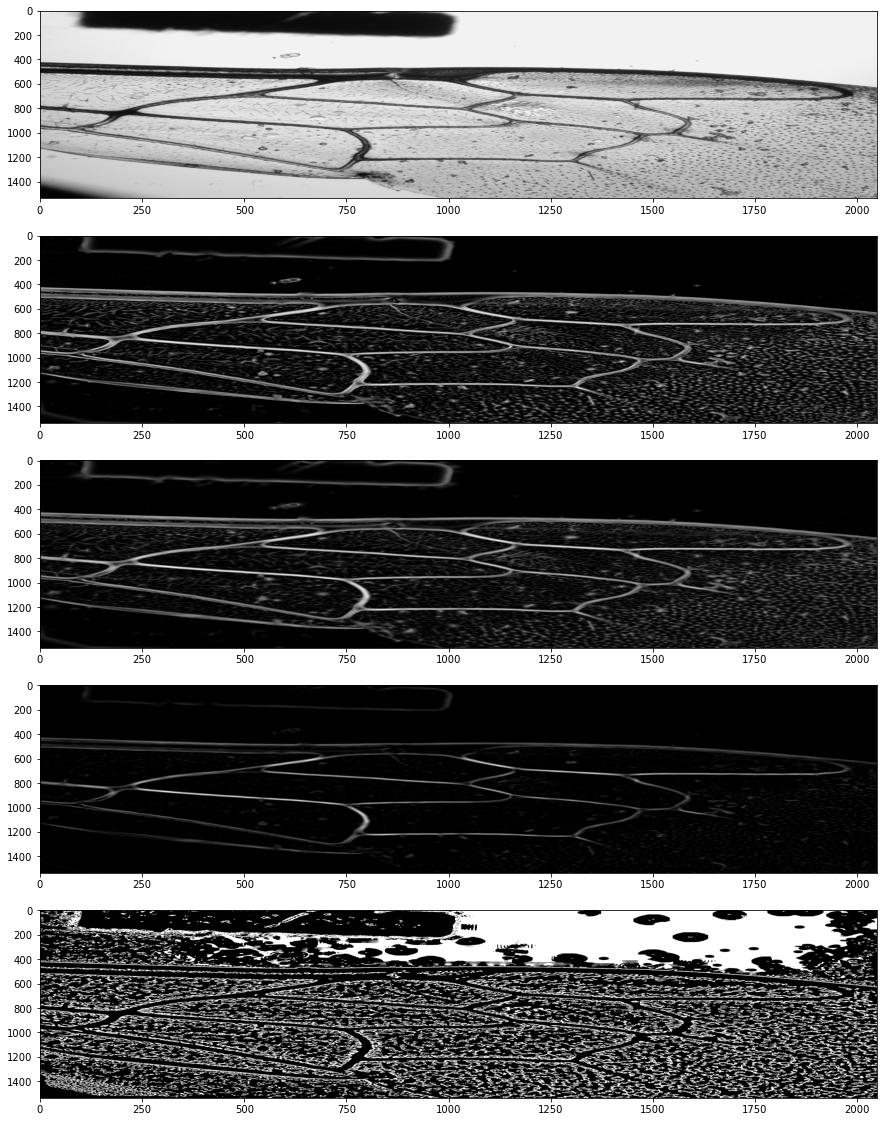

In [465]:
tmeij = meij.copy()
tsaato = saato.copy()
tfrang = frang.copy()
thess = hess.copy()

def remove_small(img):
    footprint = morphology.disk(1)
    res = morphology.white_tophat(img, footprint)
    cleaned = morphology.remove_small_objects(arr, min_size=1)
    return img - res
tmeij = remove_small(meij)
tsaato = remove_small(saato)
tfrang = remove_small(frang)
thess = remove_small(hess)
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(15,20))
ax0.imshow(image, cmap='gray', aspect='auto')
ax1.imshow(tmeij, cmap='gray', aspect='auto')
ax2.imshow(tsaato, cmap='gray', aspect='auto')
ax3.imshow(tfrang, cmap='gray', aspect='auto')
ax4.imshow(thess, cmap='gray', aspect='auto')

In [466]:
tmeij = skeletonize(tmeij)
tsaato = skeletonize(tsaato)
tfrang = skeletonize(tfrang)
thess = skeletonize(thess)

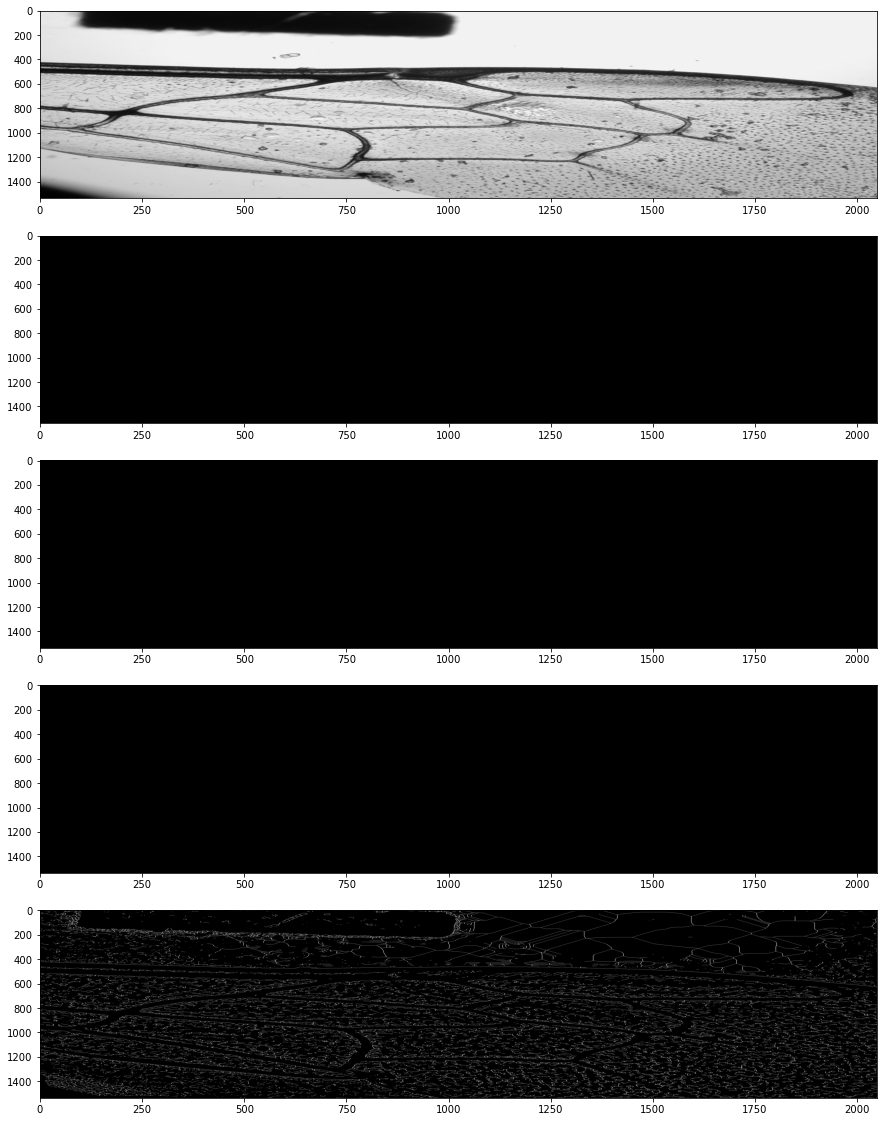

In [467]:
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(15,20))
ax0.imshow(image, cmap='gray', aspect='auto')
ax1.imshow(tmeij, cmap='gray', aspect='auto')
ax2.imshow(tsaato, cmap='gray', aspect='auto')
ax3.imshow(tfrang, cmap='gray', aspect='auto')
ax4.imshow(thess, cmap='gray', aspect='auto')

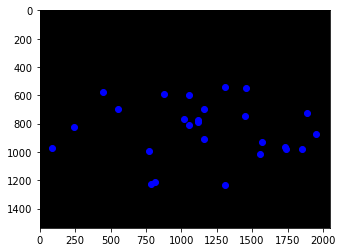

In [468]:
img = saato.copy()
gray = img
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 50, 3, 0.04)

# result is dilated for marking the corners
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_thresh = cv2.threshold(dst, 0.35*dst.max(), 255, 0)[1]
img_thresh = np.uint8(img_thresh)

# get the matrix with the x and y locations of each centroid
centroids = cv2.connectedComponentsWithStats(img_thresh)[3]


stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# refine corner coordinates to subpixel accuracy
corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), stop_criteria)
for i in range(1, len(corners)):
    #print(corners[i])
    cv2.circle(saato, (int(corners[i,0]), int(corners[i,1])), 10, (0,255,0), 2)
plt.imshow(tfrang, cmap='gray')
plt.scatter([i[0] for i in corners], [i[1] for i in corners], color='b', marker="o")
plt.show()

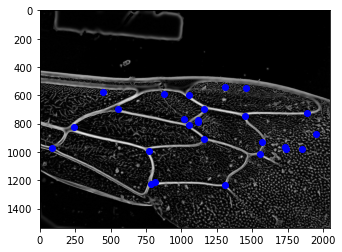

In [469]:
plt.imshow(meij, cmap='gray')
plt.scatter([i[0] for i in corners], [i[1] for i in corners], color='b', marker="o")
plt.show()

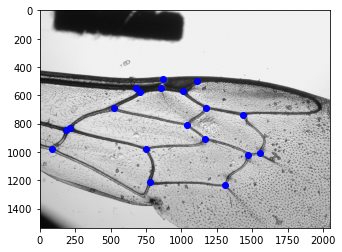

In [470]:
plt.imshow(images[0], cmap='gray')
plt.scatter(tables[0][1], tables[0][0], color='b', marker="o")
plt.show()

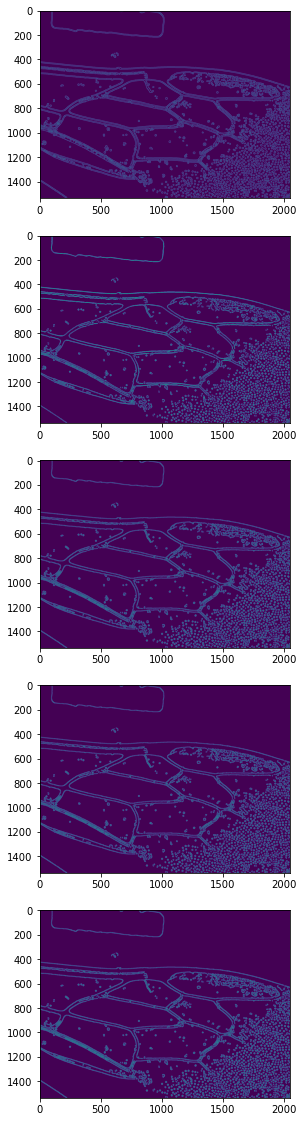

In [480]:
from skimage.feature import canny
from skimage.filters import roberts, sobel, scharr, prewitt

canny = canny(img, sigma=3.75)
roberts = roberts(img)
sobel = sobel(img)
scharr = scharr(img)
prewitt = prewitt(img)

f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(25,20))
ax0.imshow(canny)
ax1.imshow(roberts)
ax2.imshow(sobel)
ax3.imshow(scharr)
ax4.imshow(prewitt)

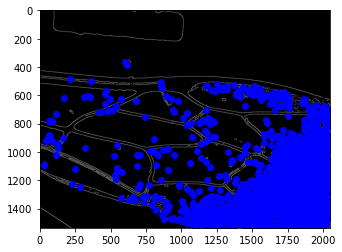

In [479]:
img = sobel.copy() * 100
gray = img
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 9, 3, 0.04)

# result is dilated for marking the corners
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_thresh = cv2.threshold(dst, 0.35*dst.max(), 255, 0)[1]
img_thresh = np.uint8(img_thresh)

# get the matrix with the x and y locations of each centroid
centroids = cv2.connectedComponentsWithStats(img_thresh)[3]


stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# refine corner coordinates to subpixel accuracy
corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), stop_criteria)
for i in range(1, len(corners)):
    #print(corners[i])
    cv2.circle(img, (int(corners[i,0]), int(corners[i,1])), 10, (0,255,0), 2)
plt.imshow(sobel, cmap='gray')
plt.scatter([i[0] for i in corners], [i[1] for i in corners], color='b', marker="o")
plt.show()

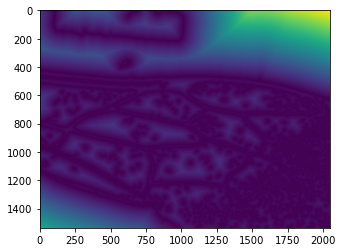

In [73]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.imshow(dt)

<ipython-input-74-5f4e5d058bbb>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = feature.peak_local_max(dt, indices=False, min_distance=5)


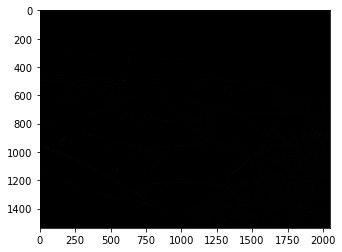

In [74]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=5)
plt.imshow(local_max, cmap='gray')

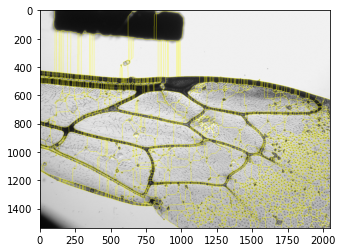

In [78]:
from skimage import morphology, segmentation
from skimage import measure

markers = measure.label(local_max)

labels = segmentation.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(img_denoised, labels))